# Вводные данные

**Где будем писать бота?**

Это можно делать в любом код-редакторе (Pycharm, VSCode, SublimeText и т.д.). Но для этого нужно устанавливать что-то на компьютер, получать ошибки, решать их. Пэтому хочу рассказать про альтернативное решение, котоое поможет начать сразу. Чтобы этого избежать предлагаю использовать [Google Colab](https://colab.research.google.com/#).

Просто войдите в свой google аккаунт и посмотрите небольшую инструкцию, как в нем работать. Можно даже скачать этот файл и открыть его в колабе, чтобы запускать и редактировать код прямо здесь.

P.S. Этот файл создан в колабе :)

# Пишем телеграм бота

In [ ]:
#@title
token = '6026505771:AAEWS9OnSIZl4ly2Fa0ybmWAFr11Hsh2aWE'

## Установка telebot

Для начала нам нужно получить токен нашего будущего бота. Как это делать через @BotFather оставляю на самостоятельное изучение. Самое главное - это зачем он нам нужен.

Токен - это грубо говоря админский ключ от бота. У кого ключ - тот и хозяин бота и говорит боту, что ему делать. Поэтому ключ должен быть скрыт и известен только вам. Распространенная ошибка пушить токен в гит в публичный репозиторий.

Для начала напишем простого эхо-бота в минимум строк. Для этого нам понадобится библиотека telebot. Установить ее можно так:

`pip install pyTelegramBotAPI`

Для google colab:

`!pip install pyTelegramBotAPI`

In [ ]:
!pip install pyTelegramBotAPI

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.4/230.4 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyTelegramBotAPI: filename=pyTelegramBotAPI-4.11.0-py3-none-any.whl size=212386 sha256=bd3db7bb4e20334b66bddf516f3c11e8ade471304f7cfdc8793f1a4aae4ed0a1
  Stored in directory: /root/.cache/pip/wheels/ee/54/14/73e9f99d3a4c02df8d106566f93bd29d41ab7f3915cc13a23d
Successfully built pyTelegramBotAPI


## Эхо-бот

Код ниже запускает самого простого бота, который просто отвечает на сообщения этим же текстом.

In [ ]:
import telebot
bot = telebot.TeleBot(token)
@bot.message_handler()
def echo_message(message):
    print(message)
    bot.send_message(chat_id=message.chat.id, text=message.text)
bot.polling()

{'content_type': 'text', 'id': 365, 'message_id': 365, 'from_user': {'id': 270438582, 'is_bot': False, 'first_name': 'Timur', 'username': 'zkrov', 'last_name': 'Zakirov', 'language_code': 'en', 'can_join_groups': None, 'can_read_all_group_messages': None, 'supports_inline_queries': None, 'is_premium': None, 'added_to_attachment_menu': None}, 'date': 1680339206, 'chat': {'id': 270438582, 'type': 'private', 'title': None, 'username': 'zkrov', 'first_name': 'Timur', 'last_name': 'Zakirov', 'is_forum': None, 'photo': None, 'bio': None, 'join_to_send_messages': None, 'join_by_request': None, 'has_private_forwards': None, 'has_restricted_voice_and_video_messages': None, 'description': None, 'invite_link': None, 'pinned_message': None, 'permissions': None, 'slow_mode_delay': None, 'message_auto_delete_time': None, 'has_protected_content': None, 'sticker_set_name': None, 'can_set_sticker_set': None, 'linked_chat_id': None, 'location': None, 'active_usernames': None, 'emoji_status_custom_emoji_

Разберем по порядку написанное. 

`import telebot`

Импорт библиотеки telebot. Она служит python оберткой для обращения к API telegram.

`bot = telebot.TeleBot("YOUR_ACCESS_TOKEN")`

Создаем экземпляр класса TeleBot по нашему токену. 

`@bot.message_handler()`

Это декоратор, по-другому функция, которая оборачивает нашу функцию ответа, чтобы мы могли не заморачиваться с запросами к API, тем что они возвращают и т.д. Вместо этого мы просто получаем сообщение, которе отправили боту и как-то его обрабатываем.

```
def echo_message(message):
    bot.send_message(chat_id=message.chat.id, text=message.text)
```

Это та самая функция, в которой мы задаем то, что будет делать наш бот. Она принимает на вход сообщение и отвечает этим же сообщением. 
Обратите внимание, что функция bot.send_message() принимает 2 аргумента: 

1.   Id чата, куда мы отправляем сообщение
2.   Текст, которым отвечаем

message - это сущность содержащая всю информацию о сообщении. Из нее можно достать информацию об отправителе, id чата, текст сообщения, изображения, файлы и т.д. В данном случае (и в большинстве остальных) нам нужно достать сам текст сообщения. Для этого через точку обращаемся к нужному атрибуту сущности:
`message.text`

И последняя стока `bot.polling()` отвечает за запуск бота. Бот посылает запросы на сервер telegram и если для нашего бота есть сообщение, то запускаются процессы перечисленные выше.

Чтобы лучше понимать из чего состоит message можно вывести его через print().


In [ ]:
import telebot
bot = telebot.TeleBot(token)
@bot.message_handler()
def echo_message(message):
    print(message)
    bot.send_message(chat_id=message.chat.id, text=message.text)
bot.polling()

{'content_type': 'text', 'id': 357, 'message_id': 357, 'from_user': {'id': 270438582, 'is_bot': False, 'first_name': 'Timur', 'username': 'zkrov', 'last_name': 'Zakirov', 'language_code': 'en', 'can_join_groups': None, 'can_read_all_group_messages': None, 'supports_inline_queries': None, 'is_premium': None, 'added_to_attachment_menu': None}, 'date': 1680338289, 'chat': {'id': 270438582, 'type': 'private', 'title': None, 'username': 'zkrov', 'first_name': 'Timur', 'last_name': 'Zakirov', 'is_forum': None, 'photo': None, 'bio': None, 'join_to_send_messages': None, 'join_by_request': None, 'has_private_forwards': None, 'has_restricted_voice_and_video_messages': None, 'description': None, 'invite_link': None, 'pinned_message': None, 'permissions': None, 'slow_mode_delay': None, 'message_auto_delete_time': None, 'has_protected_content': None, 'sticker_set_name': None, 'can_set_sticker_set': None, 'linked_chat_id': None, 'location': None, 'active_usernames': None, 'emoji_status_custom_emoji_

**Задания**

Попробуйте переделать данного бота так, чтобы он отвечал на любое сообщение 

1.   Попробуйте переделать данного бота так, чтобы он отвечал на любое сообщение словом "Привет!"
2.   А теперь точно так же, только "Привет, <имя получателя>". (Важно убедиться, что у бота есть доступ к вашему имени телеграм. Если тестируете через свой аккаунт, то включите соответствующие разрешения)



## Команды бота

Давайте теперь усложним нашего бота. Для этого вернемся к декоратору `@bot.message_handler()`.

Если не указывать аргументы, то в функцию под декоратором будут падать все сообщения подряд. Чтобы к нашему боту можно было обратиться за какой-то конкретной функцией принято обозначать команды. Рассмотри следующий код:

In [ ]:
import telebot
bot = telebot.TeleBot(token)
@bot.message_handler(commands=['over'])
def start(message):
    bot.send_message(chat_id=message.chat.id, text="Привет, я эхо-бот! Напиши, что-нибудь, а я повторю.")

@bot.message_handler()
def echo_message(message):
    bot.send_message(chat_id=message.chat.id, text=message.text)
bot.polling()

Теперь мы передаем в декоратор аргумент commands. Он содержит команду, получив которую бот будет выполнять нашу функцию. В данном случае, если пользователь напишет боту команду /start, то сообщение упадет в функцию start(), если что-то другое, то в echo_message().

Обратите внимание, что аргумент commands принимает список, это значит, что вы можете обозначить несколько команд, которые будет ловить декоратор.

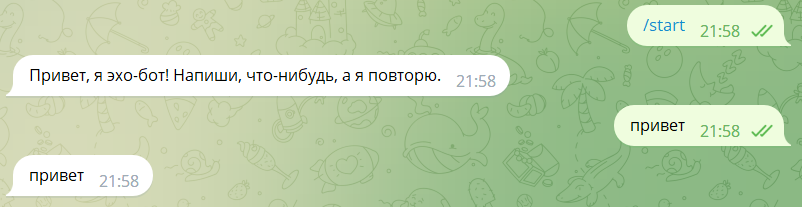

**Задание**

Создайте телеграм бота, который на команду /start отвечает "Привет, <имя получателя>", на команду /help - "Напиши, что-нибудь, а я посчитаю сколько сообщений ты отправил.", а на все остальное просто отправляет порядковый номер сообщения - "Ты уже отправил мне <число> сообщений". Пусть отчет ведется только по сообщениям, кманды не считаем.

## Учимся отправлять сообщения подряд


Возможно, вы заметили, что бот может отвечать на какие-то команды или сообщения, но сделать его инициатором диалога при помощи известных нам конструкций проблематично.

Для того, чтобы бот мог сам отправлять сообщения по заданному нами алгоритму изучим еще одну функцию. Рассмотрим уже знакомый нам код:

In [ ]:
import telebot
bot = telebot.TeleBot(token)
@bot.message_handler(commands=['start'])
def start(message):
    bot.send_message(chat_id=message.chat.id, text="Привет, я эхо-бот! Напиши, что-нибудь, а я повторю.")

@bot.message_handler()
def echo_message(message):
    bot.send_message(chat_id=message.chat.id, text=message.text)
    bot.register_next_step_handler(message, new_text)


def new_text(message):
    bot.send_message(chat_id=message.chat.id, text='Бум! Еще одно сообщение! Не ожидали?')

bot.polling()

Здесь есть небольшие изменения. 
Добавлена функция `bot.register_next_step_handler()`. Она принимает 2 обязательных аргумента:

1.   Уже знакомый нам message
2.   Callback
3.   Другие необязательные аргументы (они нам понадобятся чуть позже)

Callback - это функция, в которую отправится следующее сообщение после отработки `bot.register_next_step_handler()`. Что нам это дает?



## Подключаем класс опросника
Теперь мы можем реализовать последовательную отправку сообщений пользователю. Это уже то, что нам нужно. Давайте как это работает вместе с нашим опросом.

In [ ]:
close_options = ['Да', 'Нет']
questions = [
    {'text': 'Выходите ли вы из себя по малейшему поводу?', 'type': 'closed', 'options': close_options},
    {'text': 'Боитесь ли вы разозлить человека, который заведомо физически сильнее вас?', 'type': 'closed', 'options': close_options},
    {'text': 'Начинаете ли вы скандалить, чтобы на вас обратили внимание?', 'type': 'closed', 'options': close_options},
    # {'text': 'Любите ли вы ездить на большой скорости, даже если это связано с риском для жизни?', 'type': 'closed', 'options': close_options},
    # {'text': 'Увлекаетесь ли вы лекарствами, когда заболеете?', 'type': 'closed', 'options': close_options},
    # {'text': 'Пойдете ли вы на все, чтобы получить то, что вам очень хочется?', 'type': 'closed', 'options': close_options},
    # {'text': 'Любите ли вы больших собак?', 'type': 'closed', 'options': close_options},
    # {'text': 'Любите ли вы сидеть часами на солнце?', 'type': 'closed', 'options': close_options},
    # {'text': 'Уверены ли вы, что когда-нибудь станете знаменитостью?', 'type': 'closed', 'options': close_options},
    # {'text': 'Умеете ли вы вовремя остановиться, если чувствуете, что начинаете проигрывать?', 'type': 'closed', 'options': close_options},
    # {'text': 'Привыкли ли вы много есть, даже если не голодны?', 'type': 'closed', 'options': close_options},
    # {'text': 'Любите ли вы знать заранее, что вам подарят?', 'type': 'closed', 'options': close_options}
]

In [ ]:
class Anket:
    def __init__(self, config):
        self.config = config
        self.length = len(config)
        self.answers = None
        self.scores = 0
    def add_answers(self, answers: list):
        self.scores = 0
        self.answers = answers
        self._counter()
        return self.scores
    def get_question(self,k):
      return self.config[k].get('text')
    def _counter(self):
        for i in range(self.length):
            qtype = self.config[i].get('type')
            qoptions =  self.config[i].get('options')
            right_answer =  self.config[i].get('right_answer')
            qanswer = self.answers[i]
            if qtype == 'closed':
                self.scores += 1 if qanswer == 'Да' else + 0
            if qtype == 'multiple_choice':
                pass
            if qtype == 'number':
                pass
        print(self.scores)


anket = Anket(questions)

In [ ]:
import telebot
bot = telebot.TeleBot(token)
@bot.message_handler(commands=['start'])
def start(message):
    bot.send_message(chat_id=message.chat.id, text="Привет, я бот! Ответь на мои вопросы")
    answers = [] # список ответов (пока пустой)
    k = 0 # с какого вопроса начинаем опрос
    bot.register_next_step_handler(message, new_text, k, answers)


def new_text(message, k, answers):
    if k == anket.length: # условие выхода из рекурсии - когда зададим все вопросы
        score = anket.add_answers(answers)
        bot.send_message(chat_id=message.chat.id, text=f'спасибо за ответы, вы набрали: {score} баллов')

    else: # задаем следующий вопрос 
        answers.append(message.text) # записываем ответ на предыдущий вопрос
        bot.send_message(chat_id=message.chat.id, text=anket.get_question(k))
        k +=1 # задаем номер следующего вопроса
        bot.register_next_step_handler(message, new_text, k, answers)

bot.polling()

Вот, что получаем в телеграме:

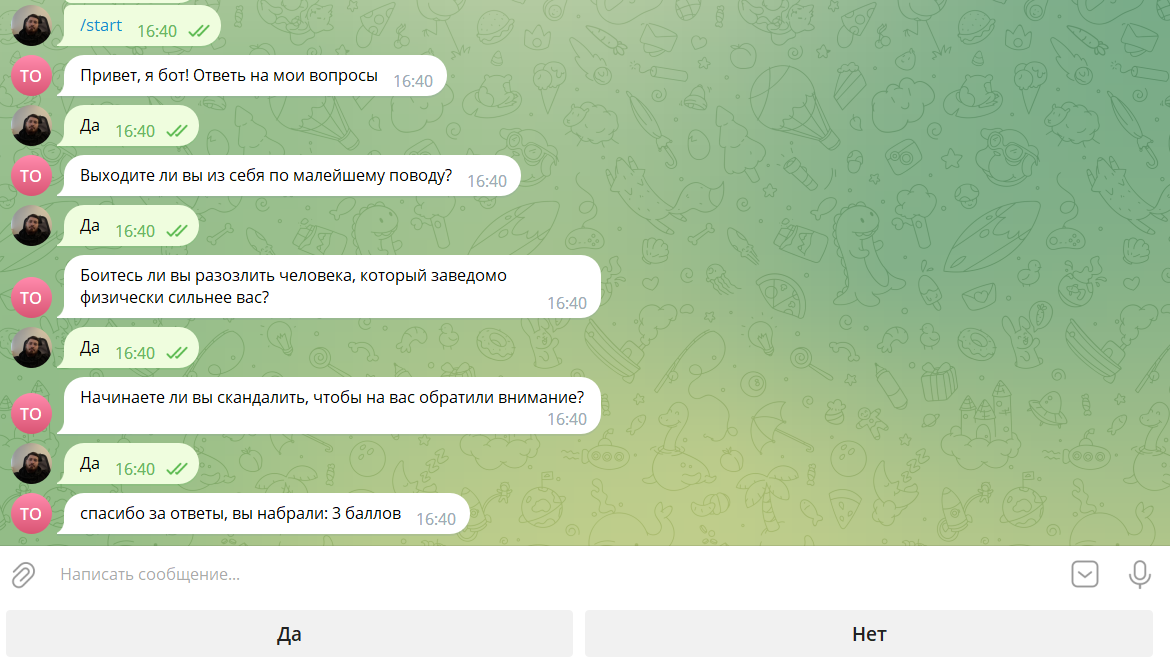


**Задание**

Аналогично привяжите ваш опрос к боту. При тестах удобно будет сократить длину конфига, чтобы тесты не занимали много времени.



## Кнопки

Код с лекции. Обратите внимание на функцию генератора клавиатуры.

In [ ]:
from telebot import types, telebot 
import json
bot = telebot.TeleBot(token)

def gen_markup(options, k):
    markup = types.InlineKeyboardMarkup()
    markup.row_width = 2
    l = [types.InlineKeyboardButton(x, callback_data='{\"questionNumber\": ' + 
                                    str(k) + ',\"answerText\": "' + x + '"}') 
                                    for x in options]
    markup.add(*l)
    return markup

@bot.callback_query_handler(func=lambda call: True)
def callback_inline(call):
    # Если сообщение из чата с ботом
    req = call.data.split('_')
    print(req)
    #Распарсим полученный JSON
    json_string = json.loads(req[0])
    k = json_string['questionNumber'] + 1
    answer = json_string['answerText']
    if k == 0 and answer == "Нет":
        k = -1
        return bot.edit_message_text(chat_id=call.message.chat.id, 
                                     message_id=call.message.message_id, 
                                     text='На нет и суда нет :)')
    answers.append(answer) # записываем ответ на предыдущий вопрос
    if k == anket.length:
        score = anket.add_answers(answers)
        return bot.edit_message_text(chat_id=call.message.chat.id, 
                          message_id=call.message.message_id, 
                          text=f'спасибо за ответы, вы набрали: {score} баллов')
        
    button_column = anket.config[k]['options']
    bot.edit_message_text(chat_id=call.message.chat.id, 
                          message_id=call.message.message_id, 
                          text=anket.get_question(k), 
                          reply_markup=gen_markup(button_column, k))


@bot.message_handler(commands=['start'])
def start(message):
    k = -1 # с какого вопроса начинаем опрос
    button_column = anket.config[k]['options']
    global answers
    answers = [] # список ответов (пока пустой)
    bot.send_message(chat_id=message.chat.id, text="Привет, я бот! Ответь на мои вопросы", reply_markup=gen_markup(button_column, k))
    

bot.polling()
# ['{"questionNumber":0,"answerText":"Да"}']

['{"questionNumber": -1,"answerText": "Да"}']
['{"questionNumber": 0,"answerText": "Да"}']
['{"questionNumber": 1,"answerText": "Да"}']
['{"questionNumber": 2,"answerText": "Да"}']
3
['{"questionNumber": -1,"answerText": "Нет"}']
['{"questionNumber": -1,"answerText": "Да"}']
['{"questionNumber": 0,"answerText": "Да"}']
['{"questionNumber": 1,"answerText": "Да"}']
['{"questionNumber": 2,"answerText": "Да"}']
3
